### Survival of Titanic Passengers

Problem Statement: </br>

The Titanic dataset provides information on the fate of the passengers on the Titanic, summarized according to economic status, sex, age and survival. </br>
Our task is to predict the survival of the Titanic passengers.. Let's install the libraries we need..

In [47]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes = True)
sns.set(font_scale = 1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [14]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df_train.shape

(891, 12)

As we see, we have 891 samples and 12 features/columns. Now let's check how many passengers are survived (as 0/1)

In [12]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

The 342 passengers were survived and 549 are not.. </br>
I need to check the "Sex" and "Embarked" distrubition according to sub-titles..

In [16]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As you see the ratio of sex about passengers, Male quantities are more then Female. </br>
Also you can see the "Embarked" details of passengers.. These abbriviations are;

* *S = Southampton*
* *C = Cherbourg*
* *Q = Queenstown*

Now we may check to "Missing Values" in the our datasets..

In [24]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

"Cabin" feature has a lot missing value (687). This value is approximately corresponds %78 of the all samples. This is high value! </br> 
Let's think about how we can deal with these missing values..

In [26]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Let's try to find out each missing value of Age with Function

In [30]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29 
        else: 
            return 24
    else:
        return Age

In [29]:
df_train.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


We can use the Pclass for each null values of Age

In [31]:
df_train["Age"] = df_train[["Age", "Pclass"]].apply(age_approx, axis=1)

Let's verify the null values after transformation..

In [32]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

We have just 2 missing values on the Embarked column. This is so less when we're thinking the size of all dataset. That's why, we can drop it.

In [34]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

As you see there are two categorical features (Age and Embarked) <br>
We can handle to these datas with dummy values

In [36]:
df_train_dummied = pd.get_dummies(df_train, columns=["Sex"])

In [37]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns=["Embarked"])

In [38]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Now we can check the heatmap for correlation of the features..

<AxesSubplot:>

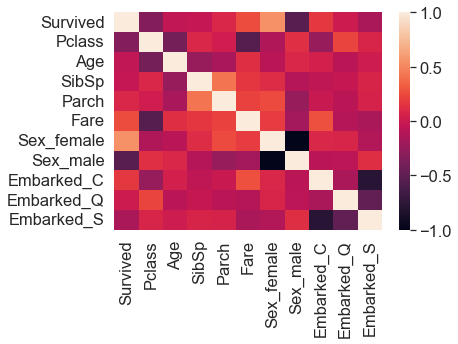

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

We can notice the strong correlation between Survived and Sex_Female variables <br>
Now let's create classifier for predict survival

In [42]:
used_features = ["Pclass", "Age", "SibSp", "Parch", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]

X = df_train_dummied[used_features].values
y = df_train_dummied["Survived"]

We adjusted the target as "Survived" and now we can split the datas

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [48]:
LogReg = LogisticRegression()

In [49]:
LogReg.fit(X_train, y_train)

C:\Users\Eren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = LogReg.predict(X_test)

In [51]:
metrics.confusion_matrix(y_test, y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

Let's interpret these results.. <br>
Out of the 161 instances of not survived. The classifier predicted correctly 143 of them. <br>
Out of the 106 actual instances of survied. The classifier predicted correctly 83 of them. <br>

Now we'll check accuracy with the accuracy_score of metrics

In [52]:
metrics.accuracy_score(y_test, y_pred)

0.8314606741573034

Our algorithm has an accuracy of **%83** <br>
That means, our model can say the 83 passengers survived or not of the each 100 of them. <br>

Let's check this performance with the confusion_matrix


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



We can further check out algorithms predicted probabilities, using the x_test values

In [54]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

The first column is the probability that the entry has not survived label <br>
And the second column is the probability that the entry has the survived label..

In [55]:
LogReg.predict_proba(X_test)

array([[0.26493799, 0.73506201],
       [0.39609163, 0.60390837],
       [0.94720321, 0.05279679],
       [0.25937855, 0.74062145],
       [0.94391572, 0.05608428],
       [0.13477162, 0.86522838],
       [0.33268393, 0.66731607],
       [0.51813457, 0.48186543],
       [0.78232369, 0.21767631],
       [0.40658216, 0.59341784],
       [0.73999523, 0.26000477],
       [0.21209008, 0.78790992],
       [0.74878044, 0.25121956],
       [0.14568359, 0.85431641],
       [0.86456084, 0.13543916],
       [0.36886436, 0.63113564],
       [0.89370373, 0.10629627],
       [0.29703023, 0.70296977],
       [0.17601675, 0.82398325],
       [0.40001768, 0.59998232],
       [0.90474941, 0.09525059],
       [0.55315361, 0.44684639],
       [0.86405505, 0.13594495],
       [0.93725914, 0.06274086],
       [0.51735016, 0.48264984],
       [0.51476565, 0.48523435],
       [0.03932607, 0.96067393],
       [0.8691477 , 0.1308523 ],
       [0.89786962, 0.10213038],
       [0.32492204, 0.67507796],
       [0.